<center>

# Spam detection

## Alejandra Camelo Cruz

### Matrikelnummer: 800385

</center>


Import modules

In [35]:
#Preprocessing and plotting packages
import scipy.io
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score


create simple function for visualization of data

In [33]:
def pie_plot(data, title):
    unique, counts = np.unique(data, return_counts=True)
    plt.figure(figsize=(8,8))

    plt.pie(
        x=counts,
        labels=['ham', 'spam'],
        autopct='%1.1f%%',
        explode=[0.05, 0.05],
        colors=sns.color_palette('Set2'))

    plt.title(
        label=title,
        pad=20)

    plt.show()


def evaluation(y_test, y_pred, title):
  accuracy = accuracy_score(y_test, y_pred)
  matrix = confusion_matrix(y_test, y_pred)
  matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

  plt.figure(figsize=(16,7))
  sns.set(font_scale=1.4)
  sns.heatmap(matrix, annot=True, annot_kws={'size':10},
                cmap=plt.cm.Greens, linewidths=0.2)
  class_names = ['ham', 'spam']
  tick_marks = np.arange(len(class_names))
  tick_marks2 = tick_marks + 0.5
  plt.xticks(tick_marks, class_names, rotation=0)
  plt.yticks(tick_marks2, class_names, rotation=0)
  plt.xlabel('Predicted label')
  plt.ylabel('True label')
  plt.title(title)

  print("Accuracy:", accuracy)
  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))
  plt.show()

# Data Handling

## Load data


In [14]:
# Load MATLAB file
mat_data = scipy.io.loadmat('emails.mat')

# Extract data
# I'll work with pandas dataframe
X = pd.DataFrame.sparse.from_spmatrix(mat_data['X'])
X = X.T #attributes are now columns and instances are rows
Y = mat_data['Y'][0]

How do data look like?

In [15]:
# How do data look like?
missing_values = X.isnull().any()
no_missing = missing_values[missing_values.isin([True])].empty
print(f'There are no missing values: {no_missing}')

# Shape of dataframe
print(X.head())
print('shape of data: ', X.shape)

There are no missing values: True
   0      1      2      3      4      5      6      7      8      9      ...  \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   

   57163  57164  57165  57166  57167  57168  57169  57170  57171  57172  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[5 rows x 57173 columns]
shape of data: 

Plot how data are distributed

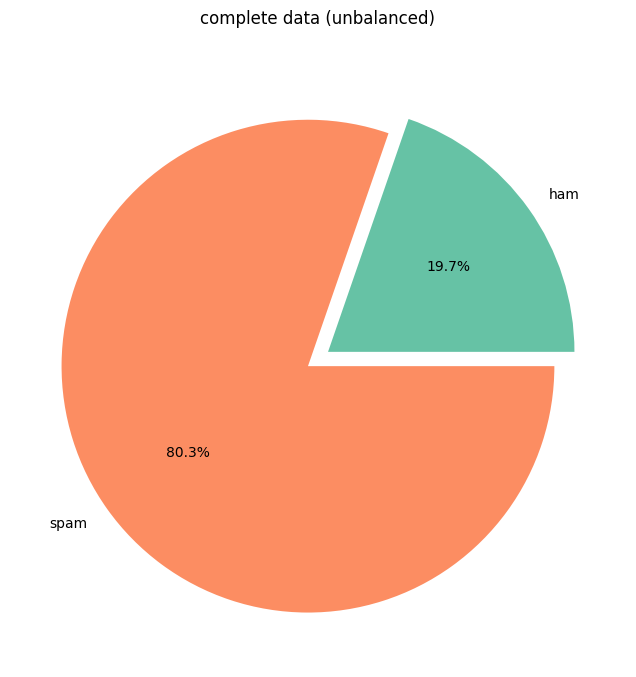

In [16]:
# Plot how data are distributed
pie_plot(Y, 'complete data (unbalanced)')

Data are mild unbalanced. However, I'll check how the model work with original data

In [17]:
# Data is mildly unbalanced but model can be tried
#1. Split train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=4)

# Random forest
Try a first model and see how it performs

1. create a classifier and fit it with training data
2. Make predictions and evaluate model

Accuracy: 0.9976
[[ 462    6]
 [   0 2032]]
              precision    recall  f1-score   support

          -1       1.00      0.99      0.99       468
           1       1.00      1.00      1.00      2032

    accuracy                           1.00      2500
   macro avg       1.00      0.99      1.00      2500
weighted avg       1.00      1.00      1.00      2500



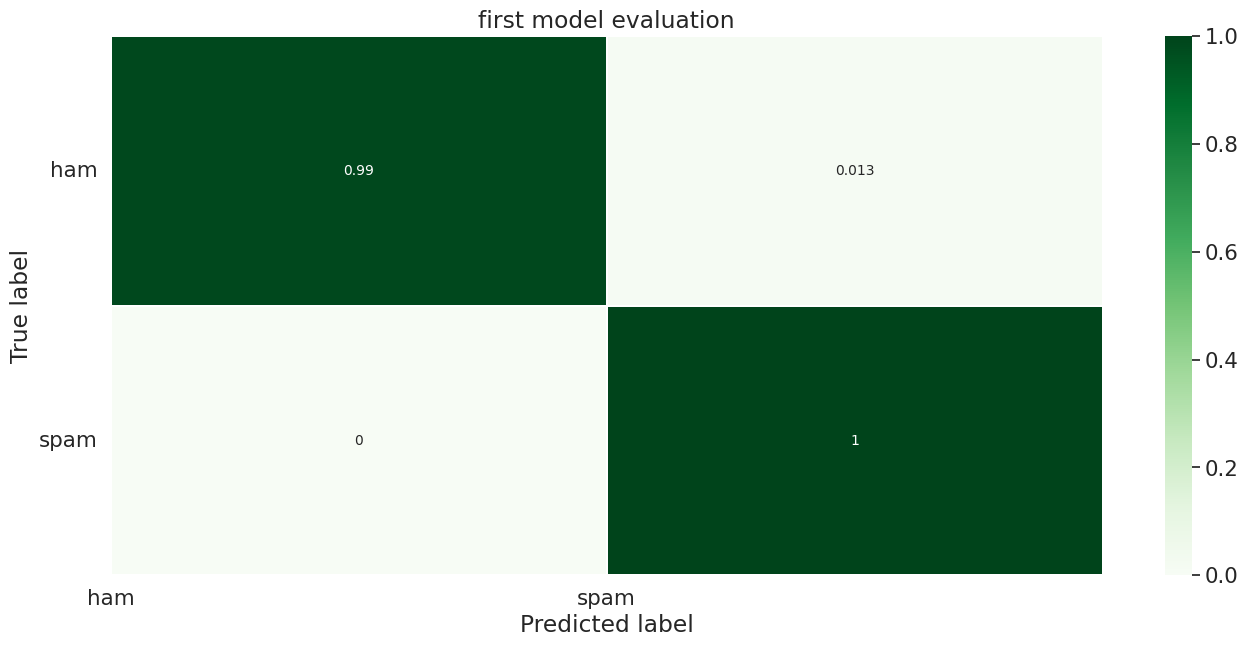

In [18]:
#1. Create and fit classifier
clf = RandomForestClassifier(random_state=4)
clf.fit(x_train, y_train)

#2. Evaluate
y_pred = clf.predict(x_test)
evaluation(y_test, y_pred, 'first model evaluation')

In [19]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 4,
 'verbose': 0,
 'warm_start': False}

3. check for better hyperparameters


In [20]:
#random_grid = { 'bootstrap': [True, False],
#'max_depth': [20, 40, 80, 100, None],
#'max_features': ['auto', 'sqrt'],
#'min_samples_leaf': [1, 2, 4],
#'min_samples_split': [2, 5, 10],
#'n_estimators': [200, 400, 600, 800, 1000]}

#clf = RandomForestClassifier(random_state=4)
#clf_tuned = RandomizedSearchCV(estimator = clf, param_distributions = random_grid,
#                               n_iter = 20, cv = 3, verbose=2,
#                               random_state=4, n_jobs = -1)

#clf_tuned.fit(x_train, y_train)

In [21]:
#clf_tuned.best_params_

In [26]:
best_random = RandomForestClassifier(n_estimators=800,
min_samples_split=2,
min_samples_leaf=1,
max_features='auto',
max_depth=None,
bootstrap=False, random_state=4)

best_random.fit(x_train, y_train)

best_random.get_params()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 800,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 4,
 'verbose': 0,
 'warm_start': False}

In [27]:
y_pred_tuned = best_random.predict(x_test)

4. Compare model evaluation.

------------------------first model evaluation-----------------------------------
Accuracy: 0.9976
[[ 462    6]
 [   0 2032]]
              precision    recall  f1-score   support

          -1       1.00      0.99      0.99       468
           1       1.00      1.00      1.00      2032

    accuracy                           1.00      2500
   macro avg       1.00      0.99      1.00      2500
weighted avg       1.00      1.00      1.00      2500



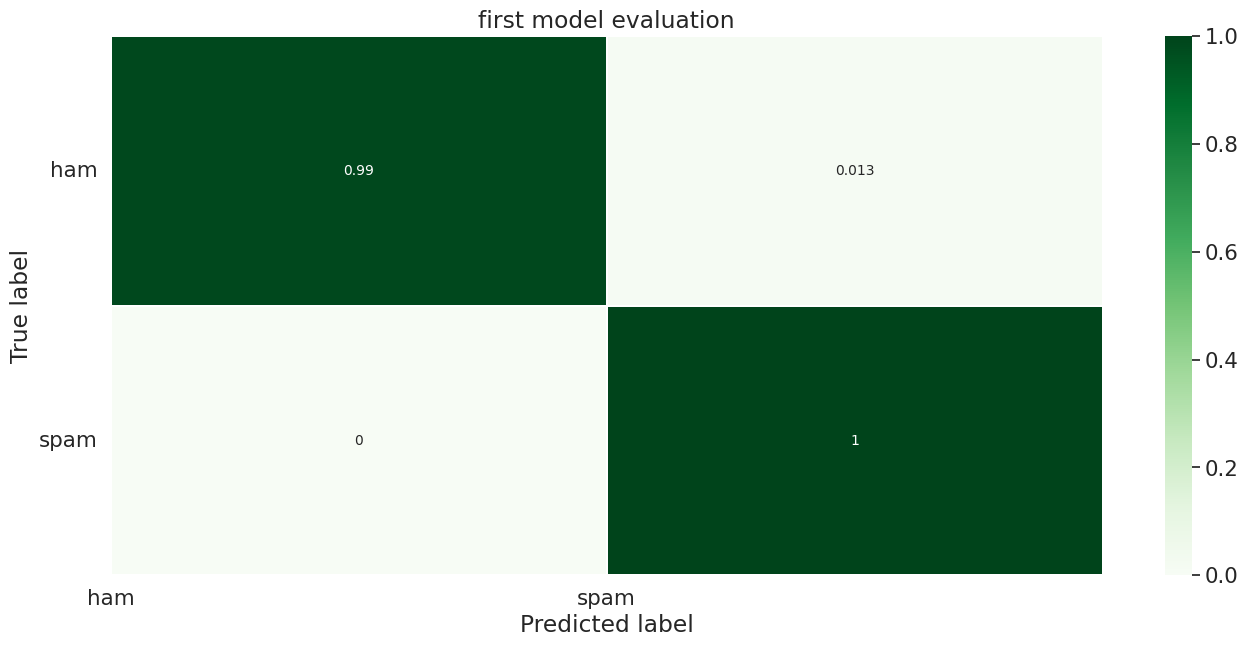

------------------------tuned model evaluation-----------------------------------
Accuracy: 0.998
[[ 464    4]
 [   1 2031]]
              precision    recall  f1-score   support

          -1       1.00      0.99      0.99       468
           1       1.00      1.00      1.00      2032

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



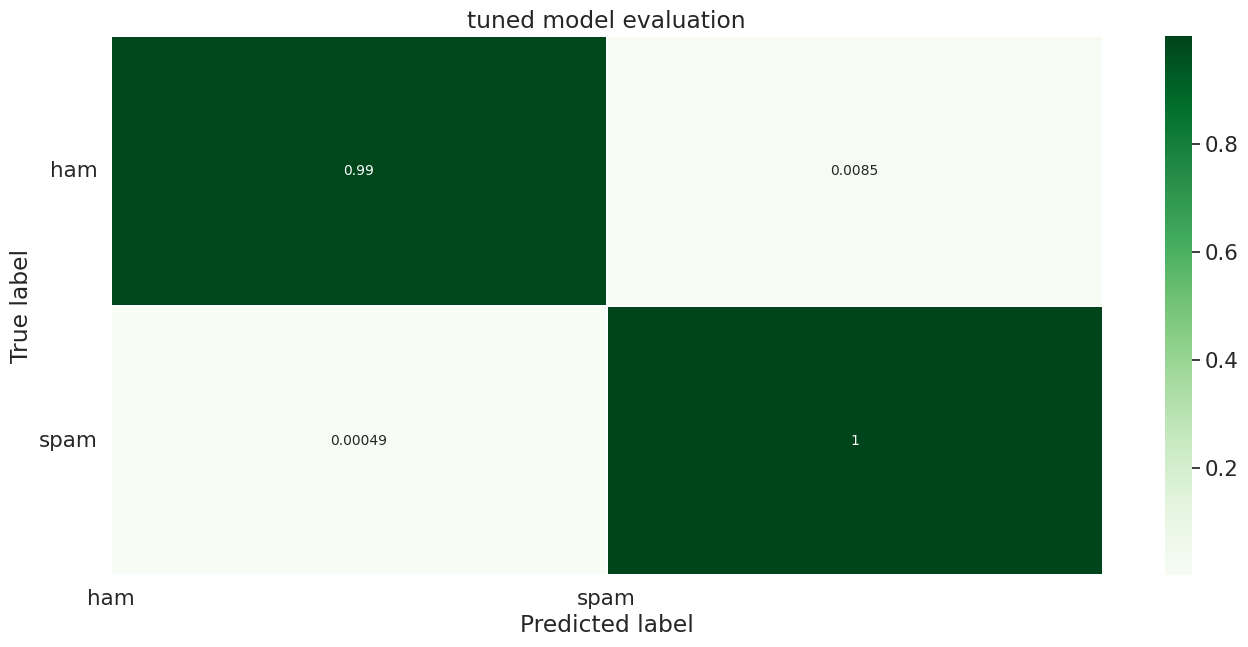

In [28]:
print('------------------------first model evaluation-----------------------------------')
evaluation(y_test, y_pred, 'first model evaluation')
print('------------------------tuned model evaluation-----------------------------------')
evaluation(y_test, y_pred_tuned, 'tuned model evaluation')

5. Compare threshold

In [37]:
y_pred_prob = best_random.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1)
roc_auc = roc_auc_score(y_test, y_pred_prob)
roc_auc

0.9997902155259438

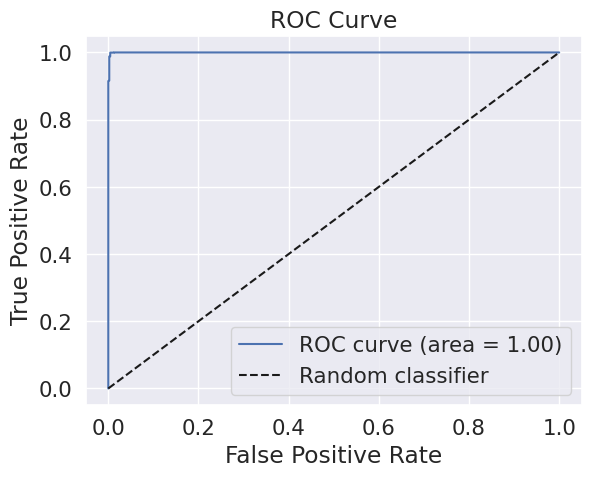

In [38]:
# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# roc curve for tpr = fpr
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Is the model overfitting? Are there reasons for this behaviour?

1. duplicated rows?

In [74]:
duplicate_rows = X[X.duplicated(keep='first')]
duplicate_indexes = list(duplicate_rows.index)

X = X.drop(duplicate_indexes)
Y = np.delete(Y, duplicate_indexes)

print('X: ', X.shape)
print('Y: ', Y.shape)

X:  (6574, 57173)
Y:  (6574,)


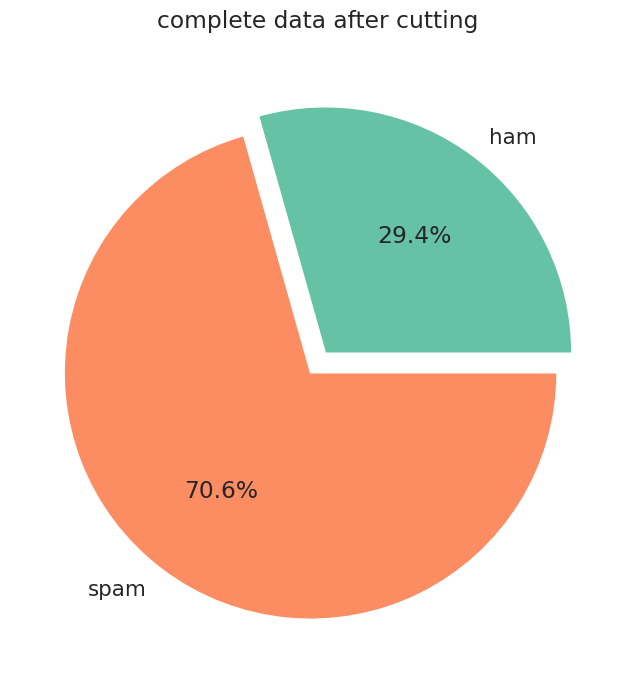

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy: 0.9927007299270073
[[ 466    9]
 [   3 1166]]
              precision    recall  f1-score   support

          -1       0.99      0.98      0.99       475
           1       0.99      1.00      0.99      1169

    accuracy                           0.99      1644
   macro avg       0.99      0.99      0.99      1644
weighted avg       0.99      0.99      0.99      1644



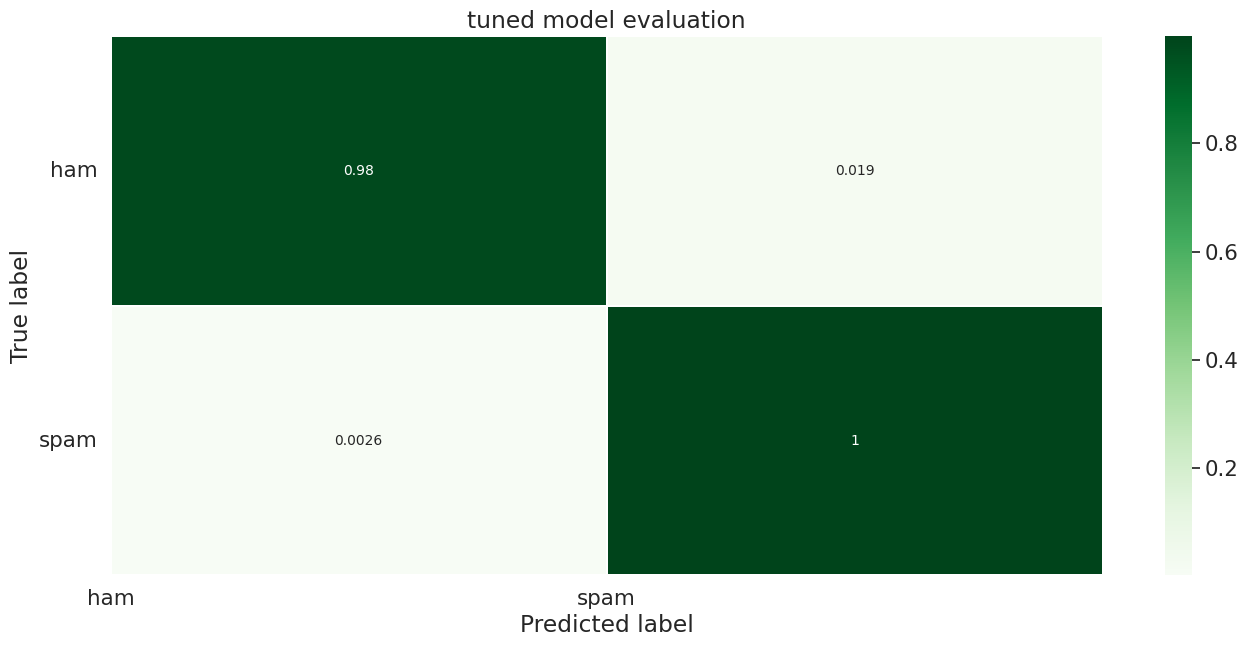

In [78]:
pie_plot(Y, 'complete data after cutting')

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=4)
best_random.fit(x_train, y_train)

y_pred_tuned = best_random.predict(x_test)

evaluation(y_test, y_pred_tuned, 'tuned model evaluation')

2. Sparse data. Non informative columns

In [ ]:
y_pred_prob = best_random.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1)
roc_auc = roc_auc_score(y_test, y_pred_prob)
roc_auc

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# roc curve for tpr = fpr
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()